In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.max_open_warning'] = -1
plt.rcParams['font.size'] = 18
import seaborn as sns
import ipywidgets
from scipy.fftpack import fft

# Interactive FFT for a time-dependent frequency sinusoid

This is an interactive plot of an FFT for a signal model
$$ y(x) = \sin(2\pi(f_0 + \dot{f}_0 x) x)$$
We will show on the left a few periods (not the full extent of the data) and on the right the corresponding FFT. Soem automatic scaling is applied so that relevant information is displayed, most importantly `df` controls the width of the frequency spectrum window.


In [111]:
def plot(f0, f1, df):
    N = int(1e6)
    dT = 1e-4
    f0 = float(f0)
    f1 = float(f1)
    df = float(df)
    f0max = 20.

    x = np.linspace(0.0, N*dT, N)
    f = f0 + f1 * x
    y = np.sin(f * 2.0*np.pi*x)
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*dT), N/2)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
    ax1.plot(x, y)
    ax1.set_xlim(0, 5*1/f0max)
    ax1.set_xlabel('$x$')
    
    ax2.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
    ax2.set_xlim(f0 - df, f0 + df)
    ax2.axvline(f0)
    ax2.set_xlabel(r'$\tilde{f}$')
    plt.show()

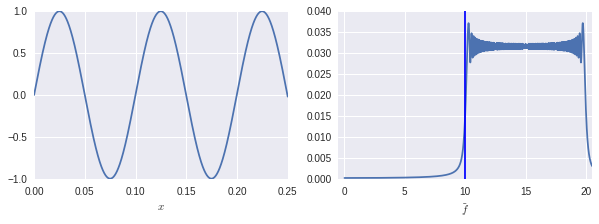

In [117]:
ipywidgets.interact(plot, f0=(8., 12, 0.25), f1=(0.001, 0.05 , 0.001), df=(1., 20, 0.5))